In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

In [2]:
hdf = pd.read_csv('C:/Users/Shreshth Arora/Desktop/Programming/Python/Projects/hdfc.csv')
hdf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-22,1162.500000,1162.500000,1130.500000,1134.349976,1079.822021,10490210
1,2019-04-23,1138.775024,1145.000000,1120.800049,1122.650024,1068.684448,7641200
2,2019-04-24,1125.000000,1141.949951,1123.525024,1139.875000,1085.081543,6177064
3,2019-04-25,1143.449951,1149.400024,1128.974976,1131.724976,1077.323242,9043318
4,2019-04-26,1132.949951,1142.500000,1128.449951,1140.474976,1085.652588,5853784


In [3]:
hdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1235 non-null   object 
 1   Open       1235 non-null   float64
 2   High       1235 non-null   float64
 3   Low        1235 non-null   float64
 4   Close      1235 non-null   float64
 5   Adj Close  1235 non-null   float64
 6   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.7+ KB


In [4]:
hdf['Date'] = pd.to_datetime(hdf['Date'])

In [5]:
print(f'Dataframe contains stock prices between {hdf.Date.min()} {hdf.Date.max()}') 
print(f'Total days = {(hdf.Date.max()  - hdf.Date.min()).days} days')

Dataframe contains stock prices between 2019-04-22 00:00:00 2024-04-19 00:00:00
Total days = 1824 days


In [6]:
hdf.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1235,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,2021-10-18 09:45:19.676113408,1399.262570,1412.378479,1384.906986,1398.677492,1355.849378,1.155096e+07
min,2019-04-22 00:00:00,770.450012,810.000000,738.750000,767.700012,736.975586,5.484040e+05
25%,2020-07-23 12:00:00,1243.400024,1249.950012,1230.000000,1241.174988,1191.069458,5.909793e+06
50%,2021-10-19 00:00:00,1450.000000,1462.900024,1435.699951,1447.900024,1410.686401,8.929855e+06
75%,2023-01-12 12:00:00,1561.775024,1574.450012,1545.325012,1559.150024,1514.375305,1.449505e+07
max,2024-04-19 00:00:00,1723.449951,1757.500000,1713.800049,1728.199951,1704.918579,8.670560e+07
std,NaN,206.882602,206.366524,208.550290,207.476115,209.855902,8.797182e+06


In [7]:
hdf['Date'] = pd.to_datetime(hdf['Date'], errors='coerce')
hdf['Open'] = pd.to_numeric(hdf['Open'], errors='coerce')
hdf['High'] = pd.to_numeric(hdf['High'], errors='coerce')
hdf['Low'] = pd.to_numeric(hdf['Low'], errors='coerce')
hdf['Close'] = pd.to_numeric(hdf['Close'], errors='coerce')
hdf['Adj Close'] = pd.to_numeric(hdf['Adj Close'], errors='coerce')

<Axes: >

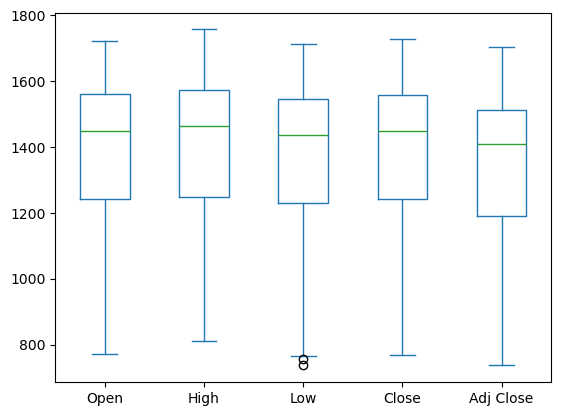

In [8]:
hdf[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [10]:
# Setting the layout for our plot
layout = go.Layout(
    title='Stock Prices of HDFC Bank',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

hdf_data = [{'x':hdf['Date'], 'y':hdf['Close']}]
plot = go.Figure(data=hdf_data, layout=layout)

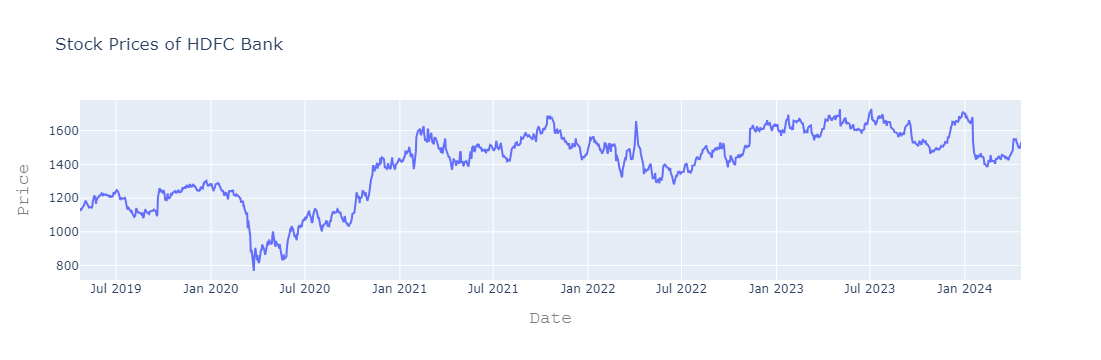

In [11]:
#plot(plot) #plotting offline
iplot(plot)

In [12]:
# Building the regression model
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [14]:
#Split the data into train and test sets
X = np.array(hdf.index).reshape(-1,1)
Y = hdf['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.6, random_state=101)

In [15]:
# Feature scaling
scaler = StandardScaler().fit(X_train)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
#Creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [19]:
#Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
hdf_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=hdf_data, layout=layout)

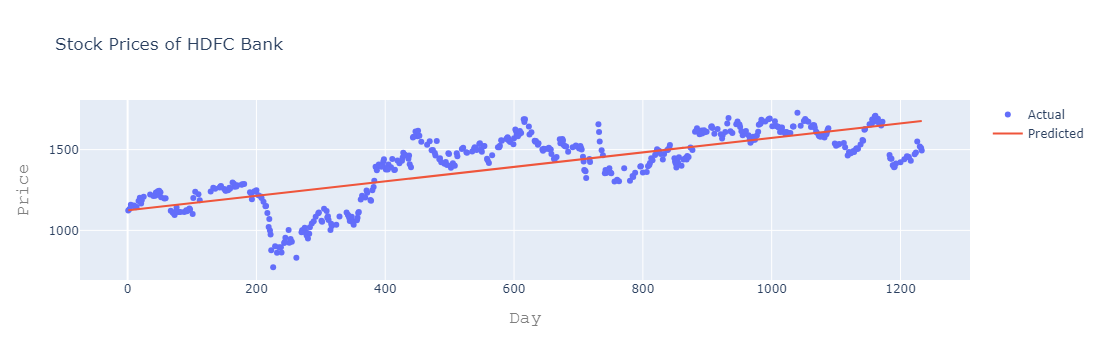

In [20]:
iplot(plot2)

In [21]:
#Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.5738908673213617	0.551954498769643
MSE       18492.65289506351	19142.354841594242

